In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
lags = np.loadtxt('fff0/data/tau.txt')
Vals = []
Vecs  =[]
for lag in lags.astype(int):
    
    C = np.loadtxt('fff0/data/Cxy'+str(lag)+'.txt')
    s = C.sum(axis=1)
    T = C/s[:,None]
    T[np.isnan(T)]=0
    vals=np.linalg.eigvals(T)
    Vals.append(vals)
    
    vals,vecs = np.linalg.eig(C)
    Vecs.append(vecs)
Vals = np.array(Vals)
Vecs = np.array(Vecs)

/usr/local/sw/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide


/usr/local/sw/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log


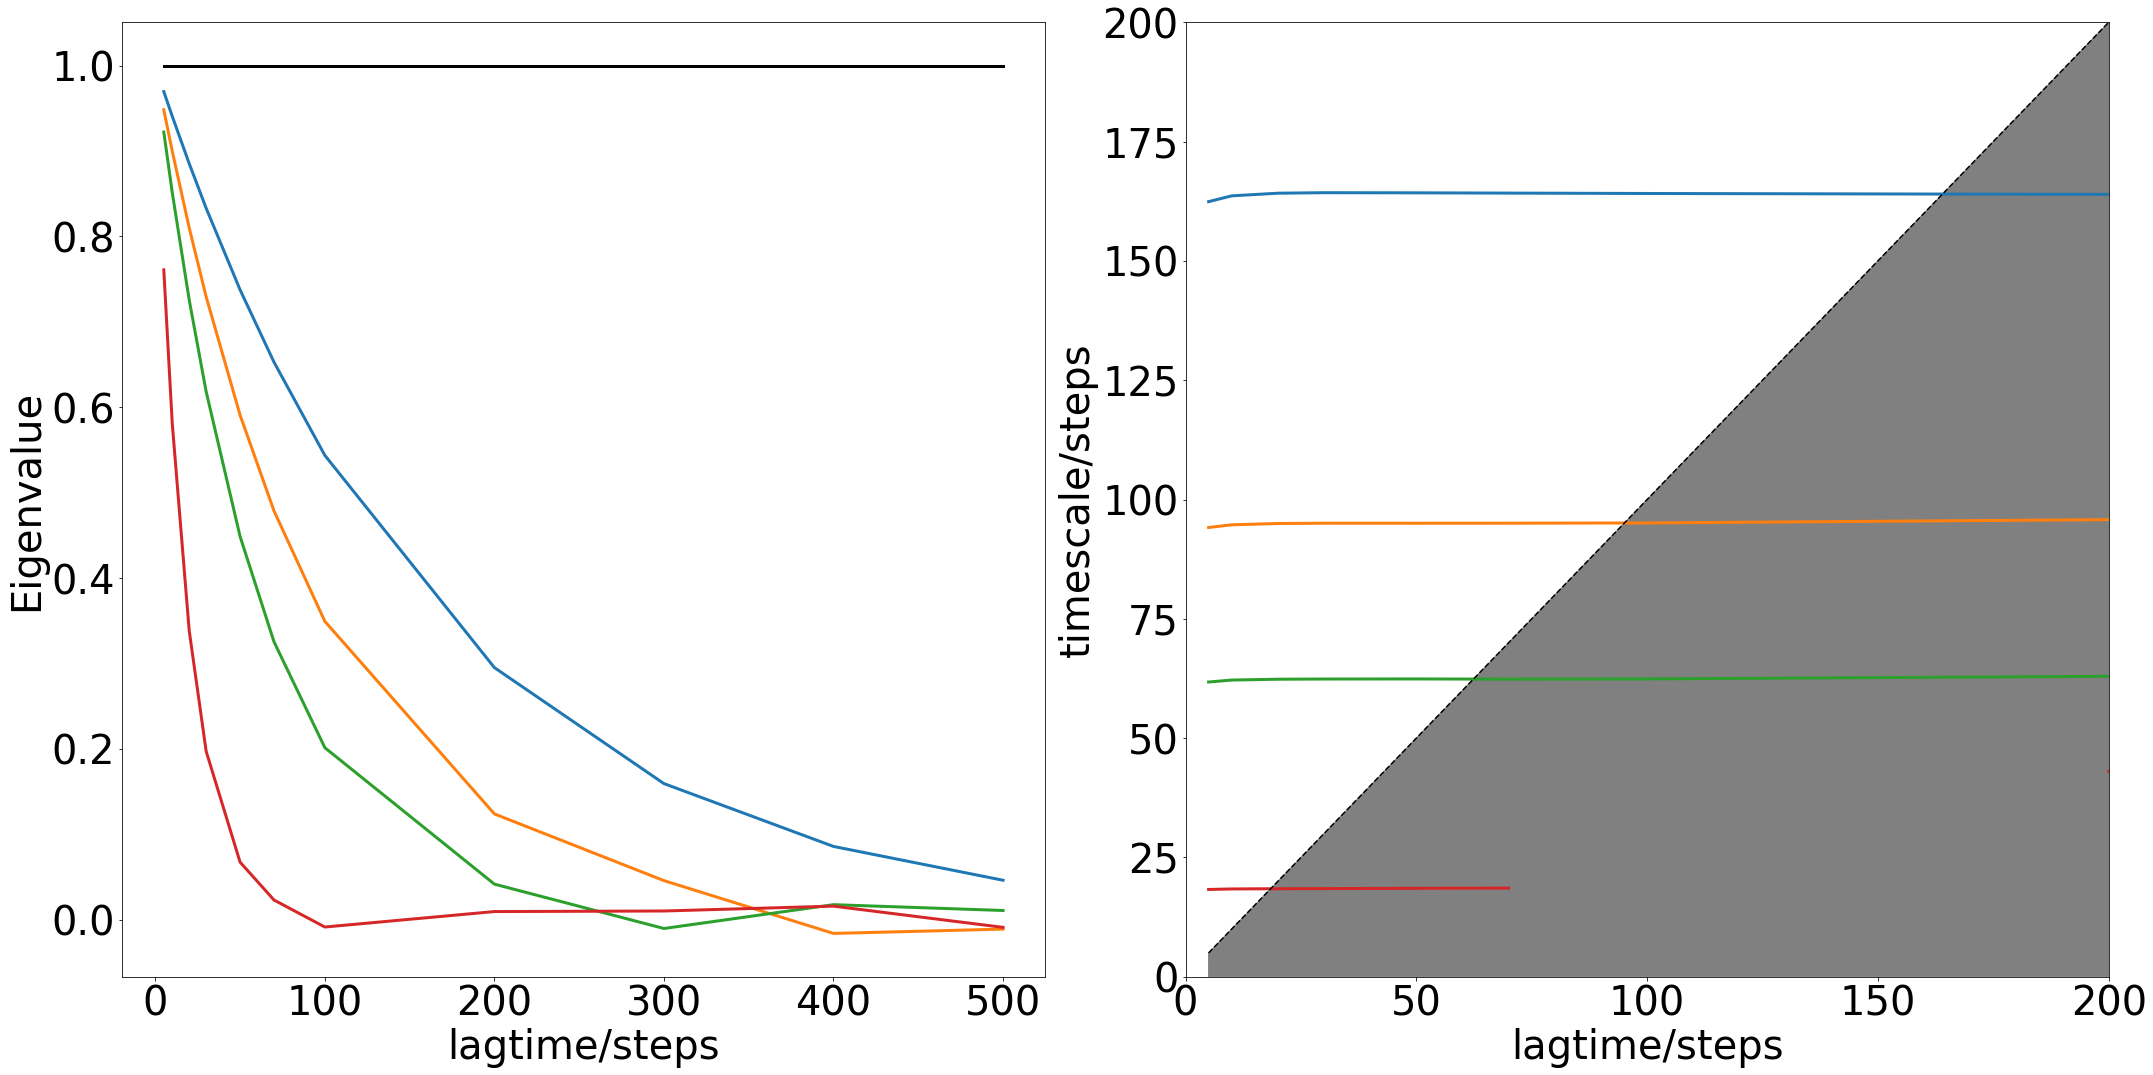

In [103]:
plt.figure(figsize=(30,15))
fs=40
plt.subplot(121)

plt.plot(lags,Vals[:,0],'k',linewidth=3,)
plt.plot(lags,Vals[:,1:5],linewidth=3)
plt.xlabel('lagtime/steps',size=fs)
plt.ylabel('Eigenvalue',size=fs)
plt.tick_params(labelsize=fs)




plt.subplot(122)
plt.plot(lags,-lags[:,None]/np.log(Vals[:,1:5]),linewidth=3,)
plt.xlim(0,200)
plt.ylim(0,200)
plt.plot(lags,lags,'k--')
plt.fill_between(lags,lags,color='grey')
plt.xlabel('lagtime/steps',size=fs)
plt.ylabel('timescale/steps',size=fs)
plt.tick_params(labelsize=fs)

plt.tight_layout()

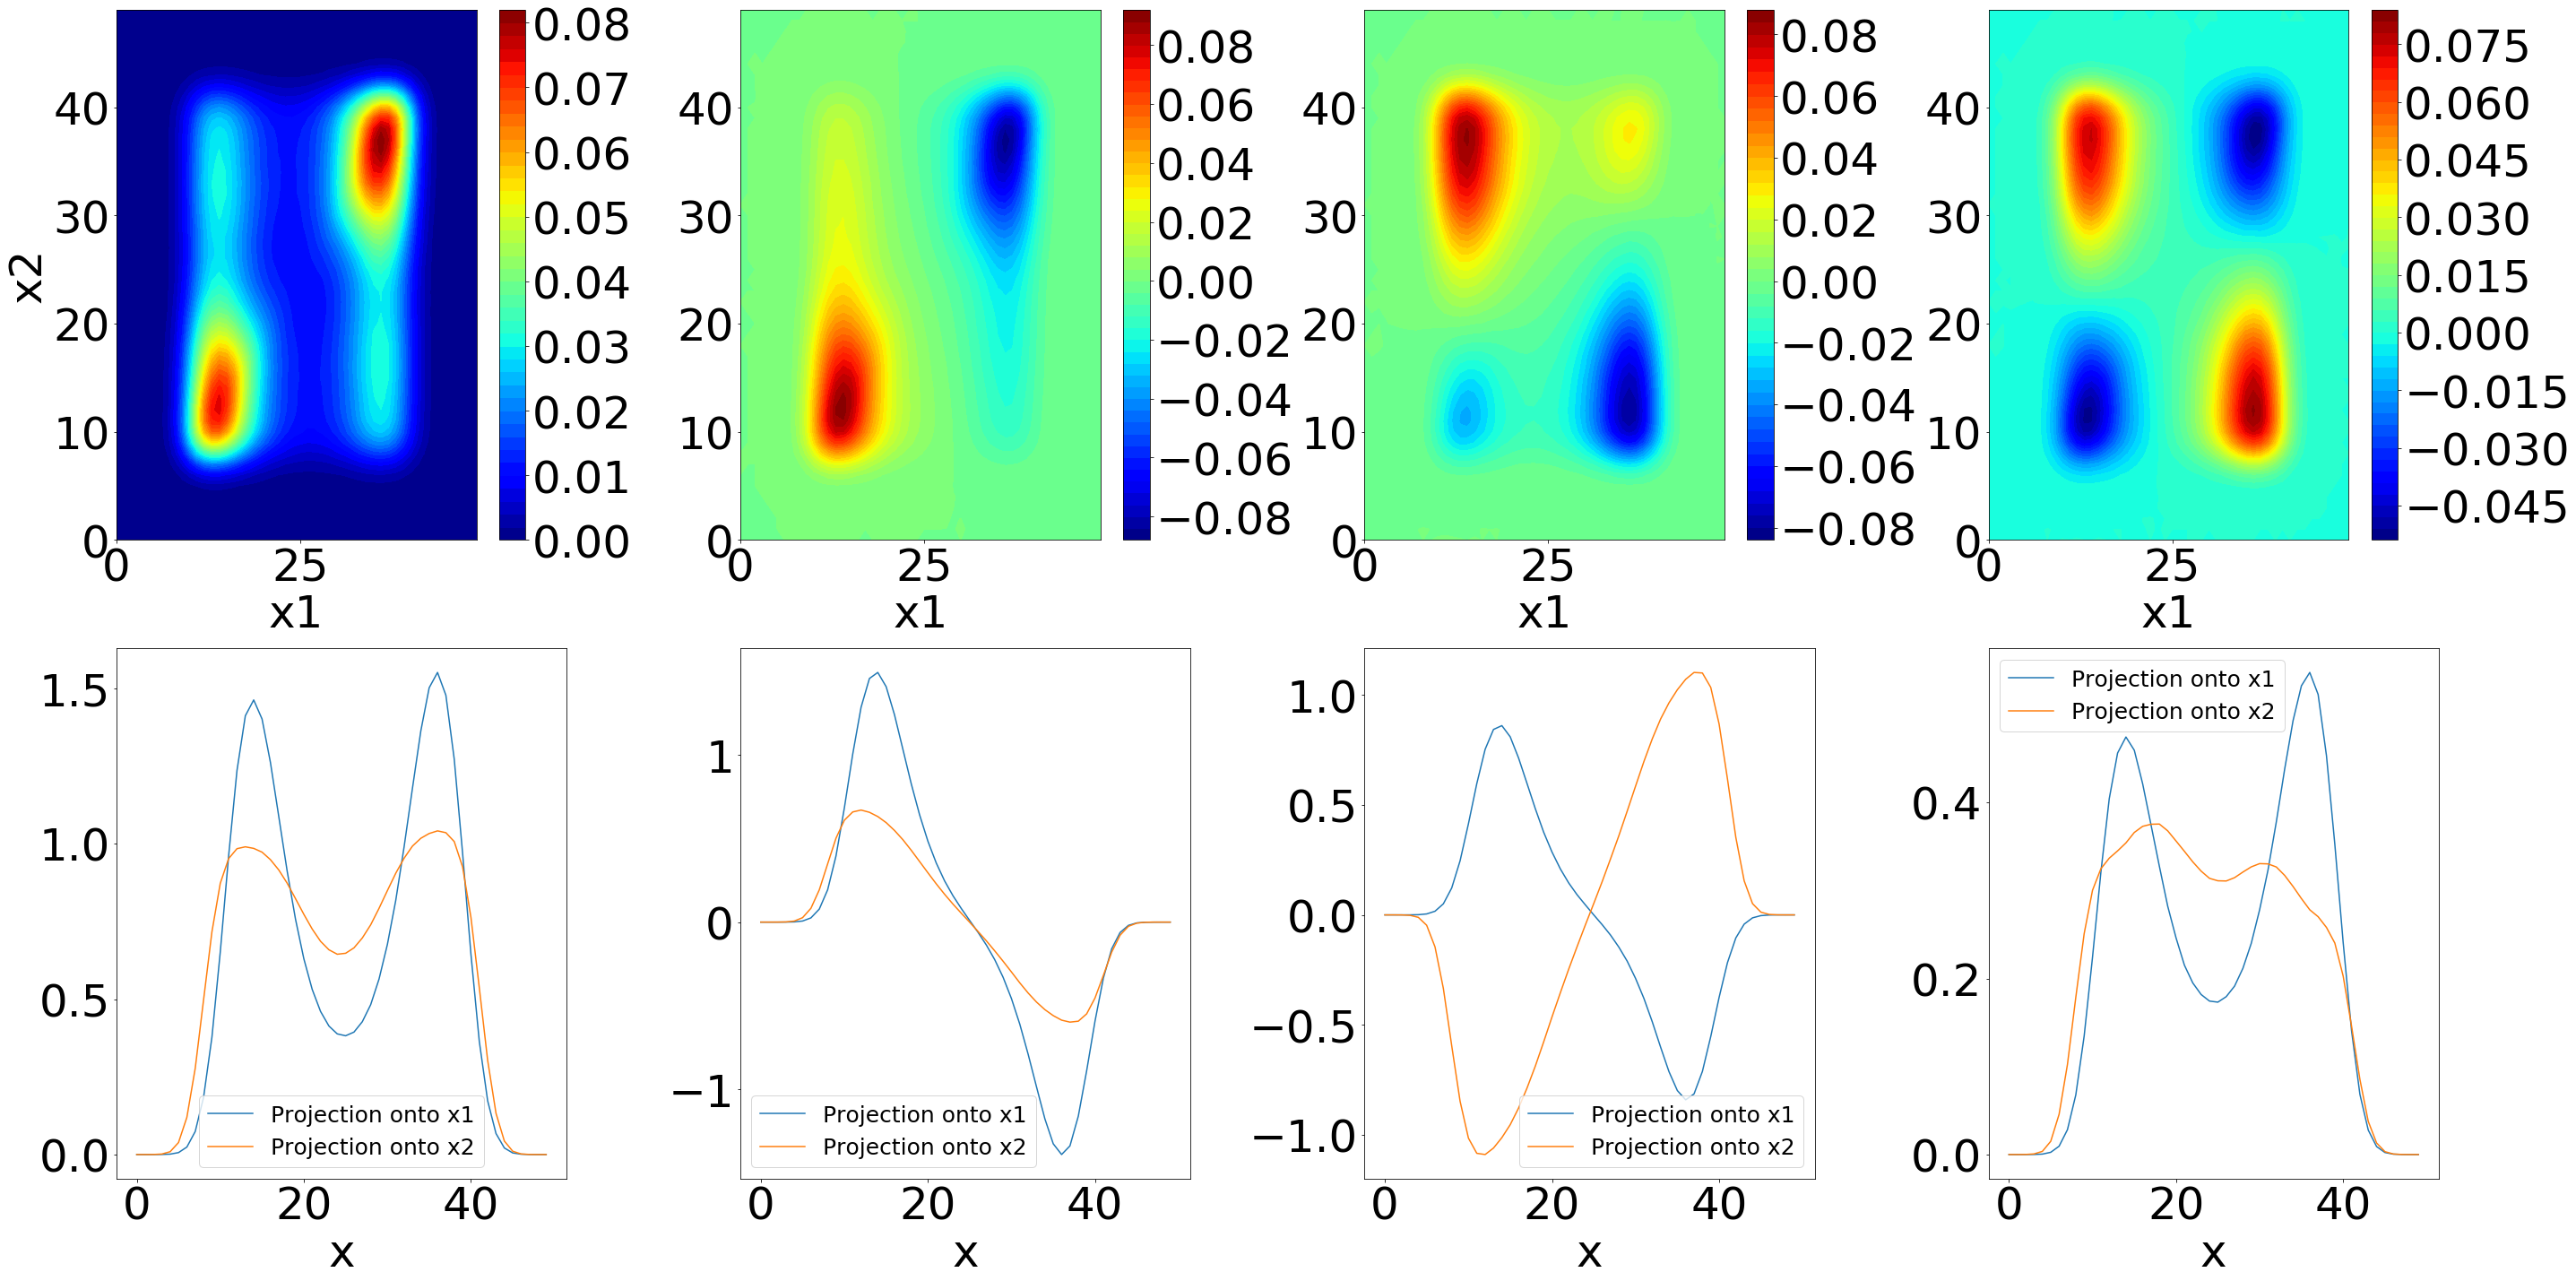

In [189]:
plt.figure(figsize=(40,20))
fs = 50
l=3
plt.subplot(241)
plt.contourf(Vecs[l,:,0].reshape(50,50).T,50,cmap=plt.cm.jet)
plt.xlabel('x1',size=fs)
plt.ylabel('x2',size=fs)
plt.tick_params(labelsize=fs)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fs)

plt.subplot(245)
plt.plot(Vecs[l,:,0].reshape(50,50).sum(axis=1),label='Projection onto x1')
plt.plot(Vecs[l,:,0].reshape(50,50).sum(axis=0),label='Projection onto x2')
plt.legend(fontsize=fs/2)
plt.xlabel('x',size=fs)
plt.tick_params(labelsize=fs)

plt.subplot(242)
plt.contourf(Vecs[l,:,1].reshape(50,50).T,50,cmap=plt.cm.jet)
plt.xlabel('x1',size=fs)
# plt.ylabel('x2',size=fs)
plt.tick_params(labelsize=fs)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fs)

plt.subplot(246)
plt.plot(Vecs[l,:,1].reshape(50,50).sum(axis=1),label='Projection onto x1')
plt.plot(Vecs[l,:,1].reshape(50,50).sum(axis=0),label='Projection onto x2')
plt.legend(fontsize=fs/2)
plt.xlabel('x',size=fs)
plt.tick_params(labelsize=fs)

plt.subplot(243)
plt.contourf(Vecs[l,:,2].reshape(50,50).T,50,cmap=plt.cm.jet)
plt.xlabel('x1',size=fs)
# plt.ylabel('x2',size=fs)
plt.tick_params(labelsize=fs)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fs)

plt.subplot(247)
plt.plot(Vecs[l,:,2].reshape(50,50).sum(axis=1),label='Projection onto x1')
plt.plot(Vecs[l,:,2].reshape(50,50).sum(axis=0),label='Projection onto x2')
plt.legend(fontsize=fs/2)
plt.xlabel('x',size=fs)
plt.tick_params(labelsize=fs)

plt.subplot(244)
plt.contourf(Vecs[l,:,3].reshape(50,50).T,50,cmap=plt.cm.jet)
plt.xlabel('x1',size=fs)
# plt.ylabel('x2',size=fs)
plt.tick_params(labelsize=fs)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fs)

plt.subplot(248)
plt.plot(Vecs[l,:,3].reshape(50,50).sum(axis=1),label='Projection onto x1')
plt.plot(Vecs[l,:,3].reshape(50,50).sum(axis=0),label='Projection onto x2')
plt.legend(fontsize=fs/2)
plt.xlabel('x',size=fs)
plt.tick_params(labelsize=fs)
# plt.colorbar()

plt.tight_layout()